In [29]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy
import random
import scipy.constants as const

In [74]:
np.random.uniform()

0.0023263401692301677

### Define functions

In [ ]:
# generate NxN grid of spin either with -1 or 1 for ising model 
def generate_grid(N):
    return np.random.choice([-1,1],(N,N))

def energy_interaction_with_neighbors(grid,i,j):
    length = len(grid[0]) # assuming quadratic grid

    random_point = grid[i,j]

    """if i == 0:
        left = grid[length-1,j]
    else:
        left = grid[i-1,j]

    if i == length-1:
        right = grid[0,j]
    else:
        right = grid[i+1,j]

    if j == 0:
        up = grid[i,length-1]
    else:
        up = grid[i,j-1]

    if j == length-1:
        down = grid[i,0]
    else:
        down = grid[i,j+1]"""

    left = grid[(i-1)%length,j]
    right = grid[(i+1)%length,j]
    up = grid[i,(j-1)%length]
    down = grid[i,(j+1)%length]

    # calculate energy of the grid
    energy = - random_point * (left+right+up+down)
    return energy

def M(array): #magnetization function
    return np.sum(array)

def U(array,a): #internal energy functio 
    U = 0
    length = len(array[0])
    for i in range(length):
        for j in range(length):
            U += energy_interaction_with_neighbors(array,i,j)
    U  -= a*M(array) # a = myu*B/Energy
    return U 

def heat_capacity(array,temperature):
    return (np.mean(array**2) - np.mean(array)**2) / (temperature**2)

# calculate energy of the grid
def Hamiltonian_Monte_carlo(grid,temperature, a = 0, J = 1):
    length = len(grid[0])
    i = np.random.randint(0,length-1)
    j = np.random.randint(0,length-1)
    count = 0

    d_energy =  J * 2 * energy_interaction_with_neighbors(grid,i,j) - 2*a
    
    # flip spin according to Energy
    if d_energy > 0 :
        grid[i,j] = - grid[i,j]
        count += 1
    elif np.random.uniform() < np.exp(d_energy/(temperature)):
            grid[i,j] = - grid[i,j]
            count += 1

    #print(grid)
    return grid, count

### Calculate and iterate

In [31]:
length_grid = 64
grid_array = generate_grid(length_grid)

/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_21588/853328167.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


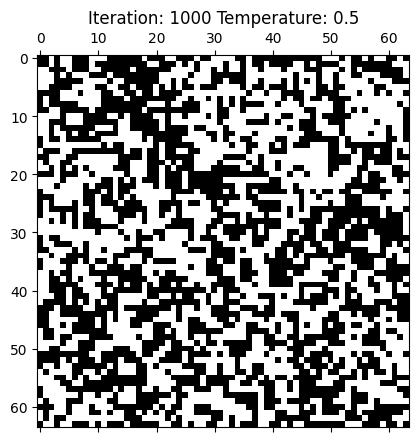

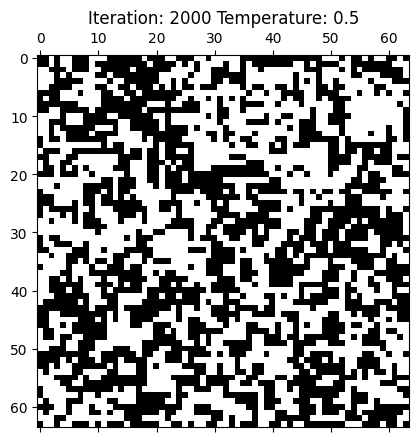

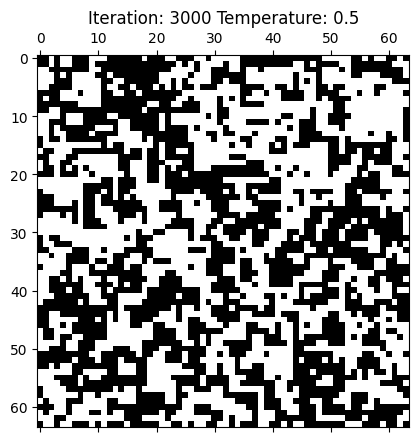

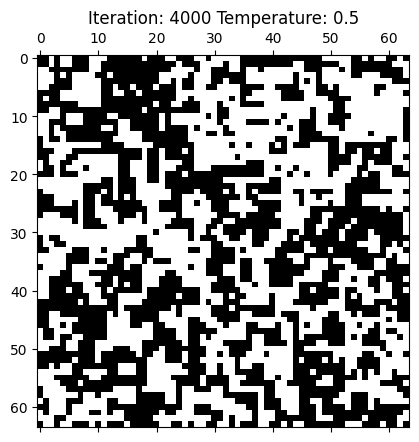

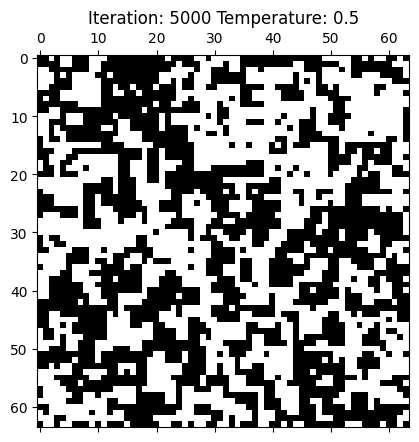

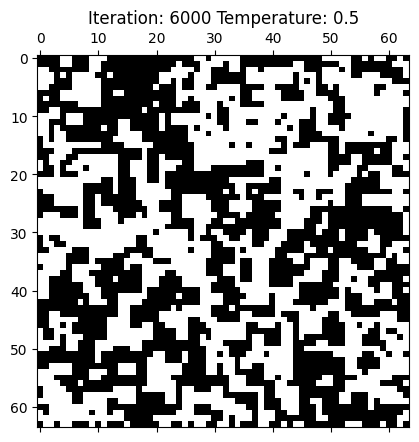

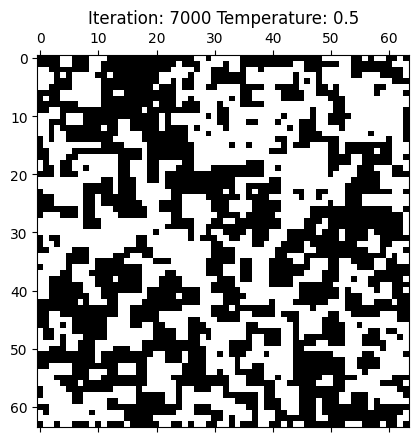

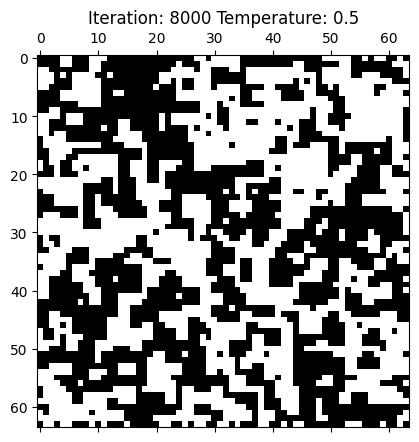

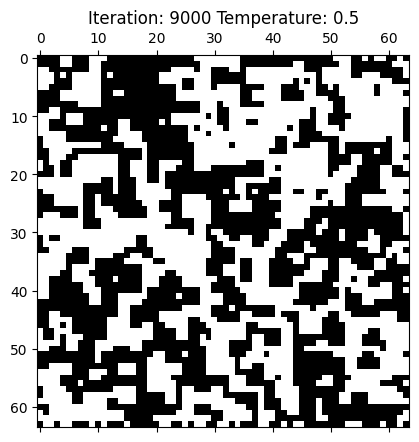

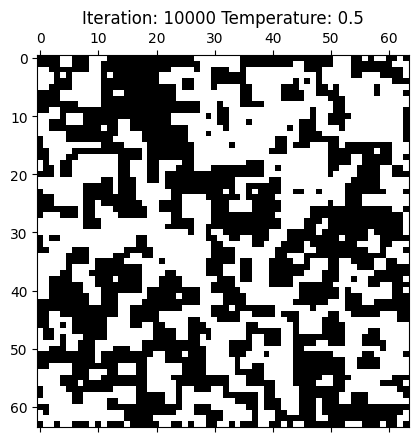

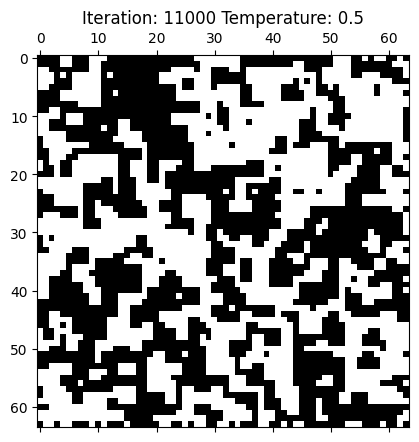

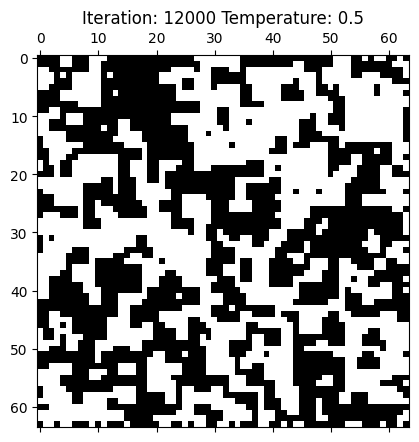

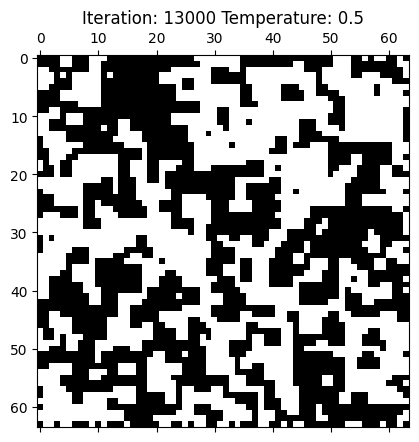

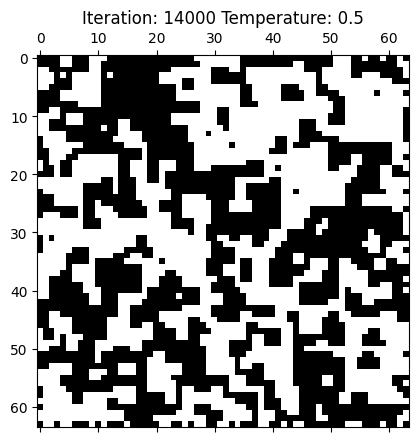

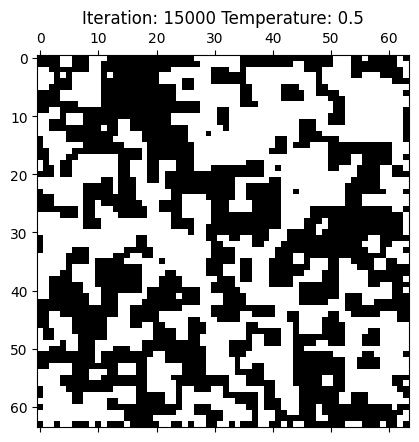

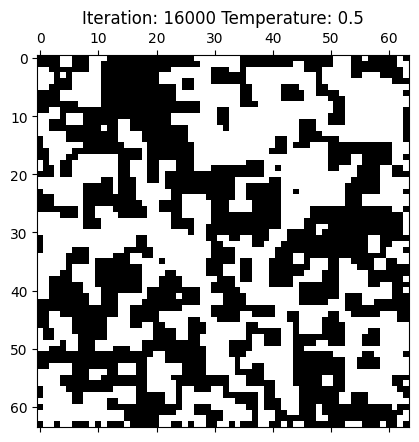

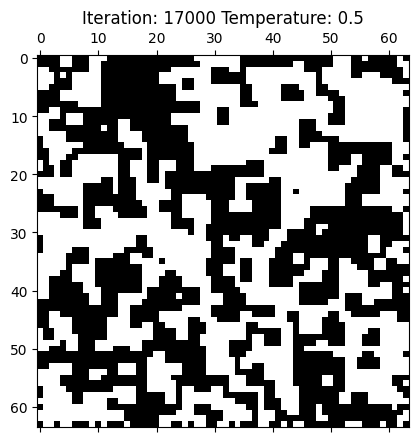

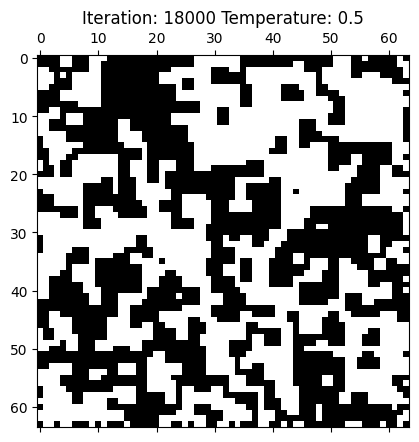

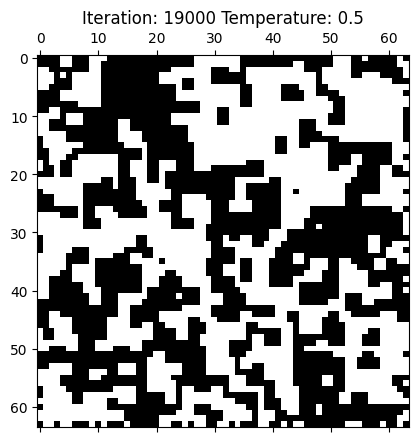

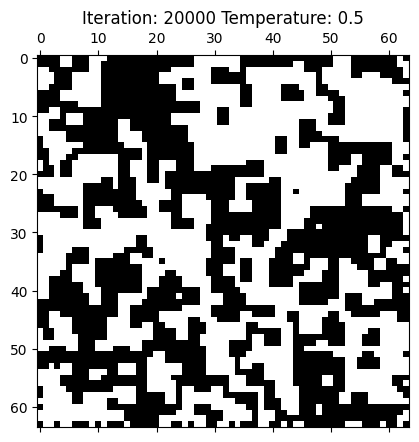

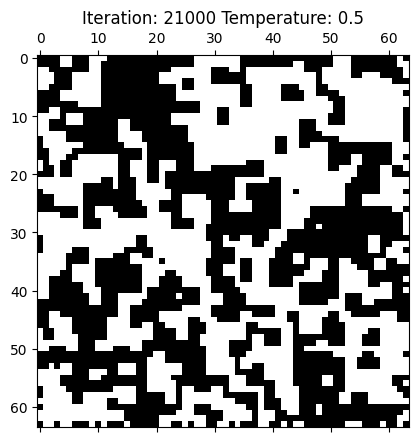

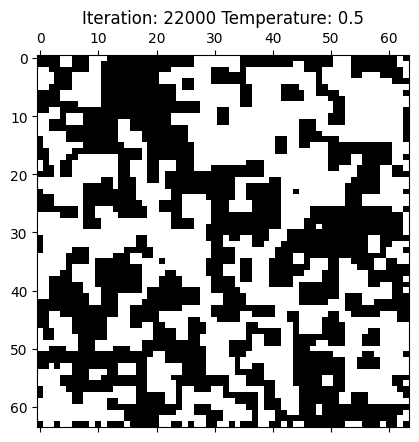

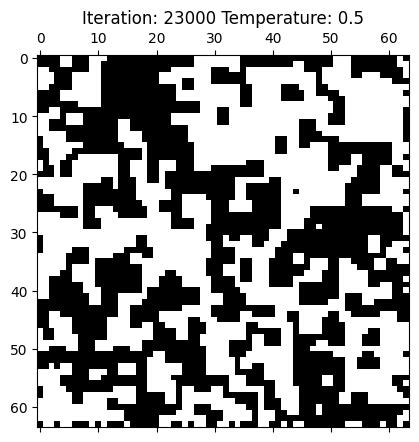

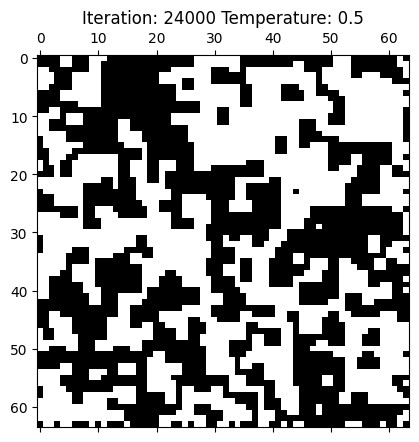

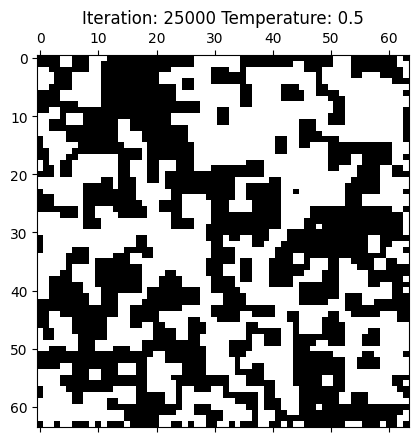

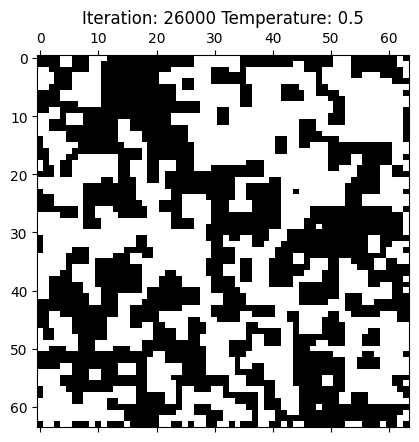

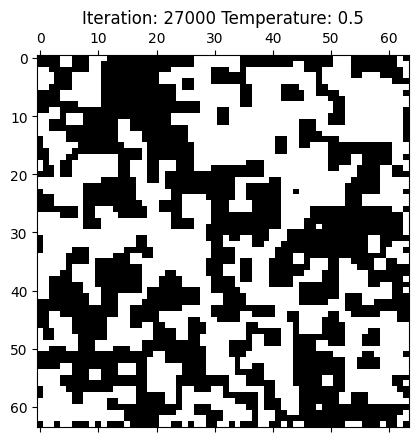

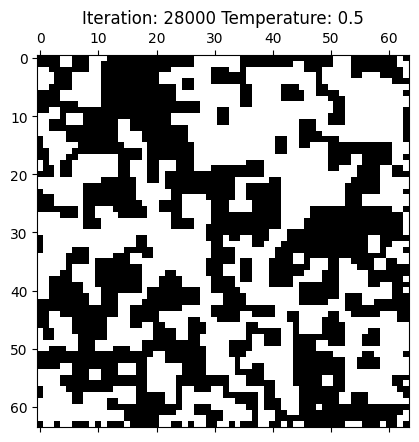

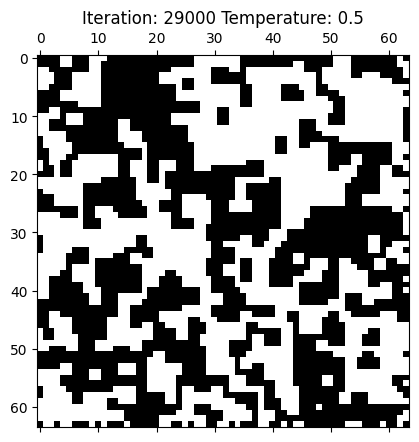

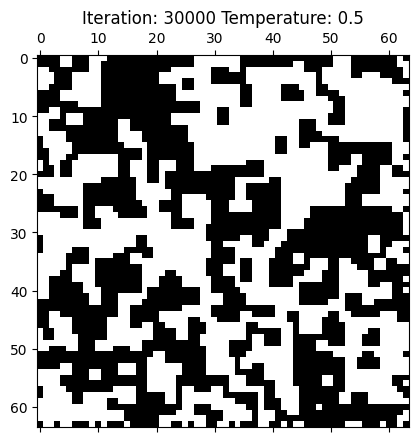

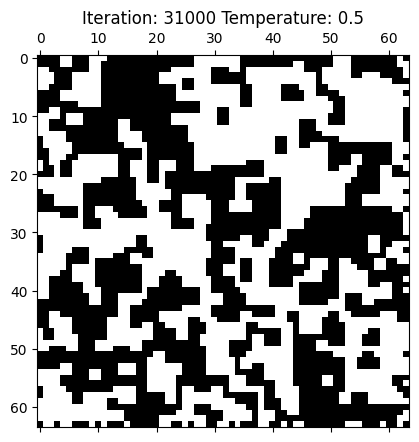

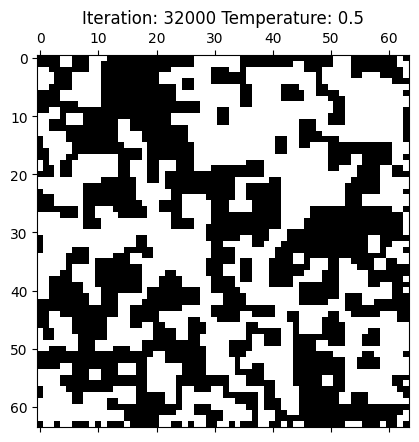

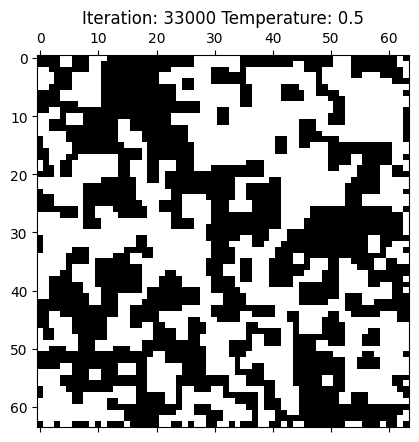

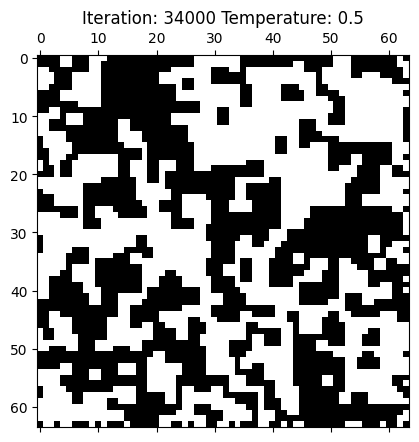

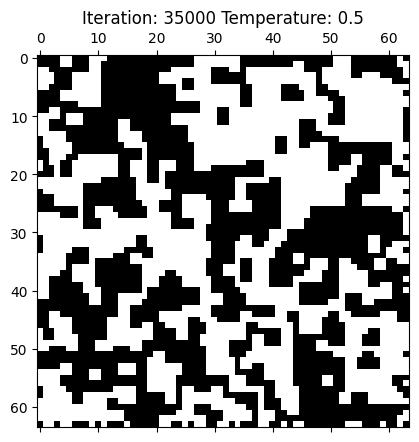

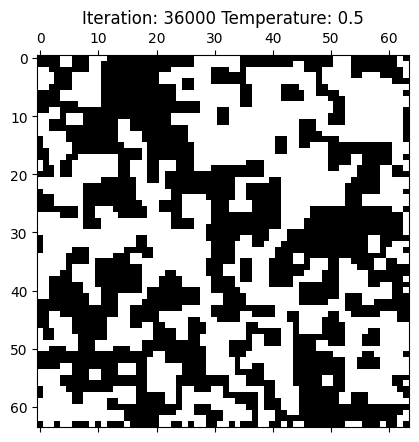

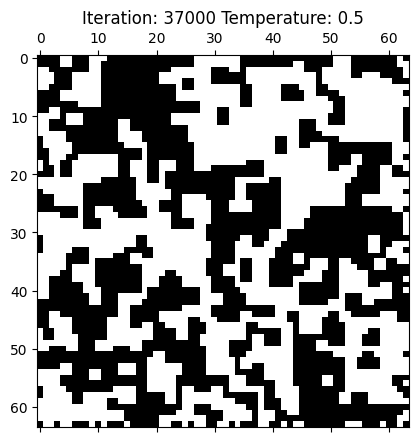

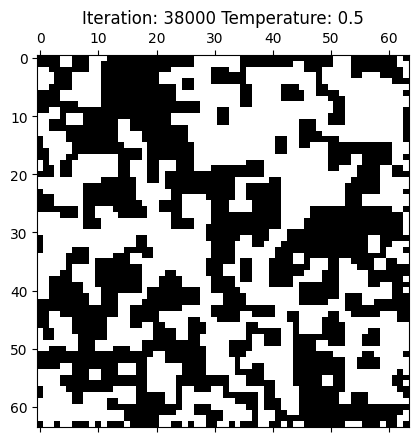

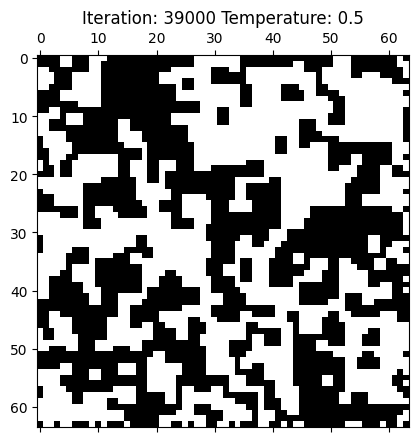

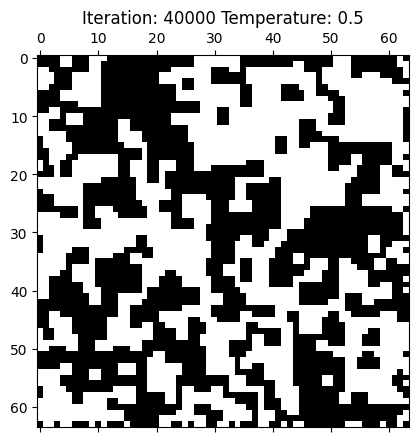

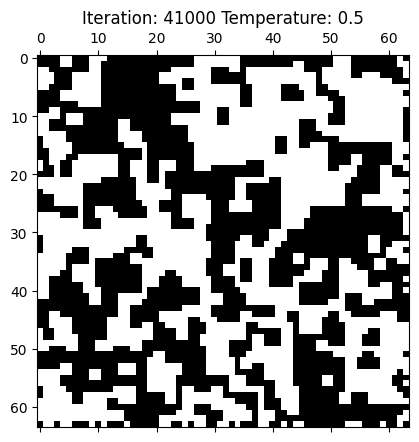

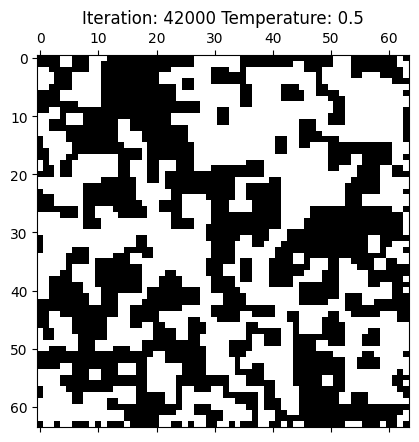

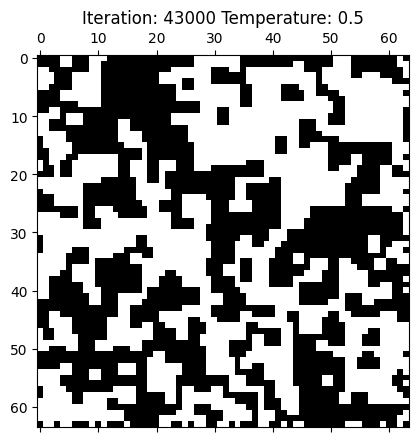

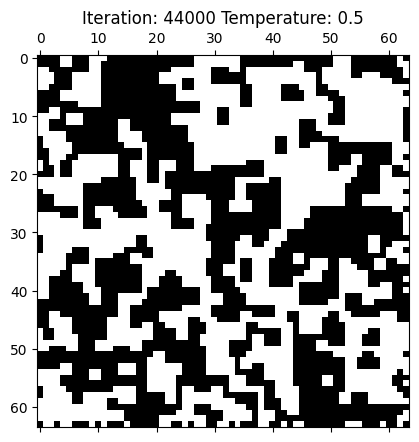

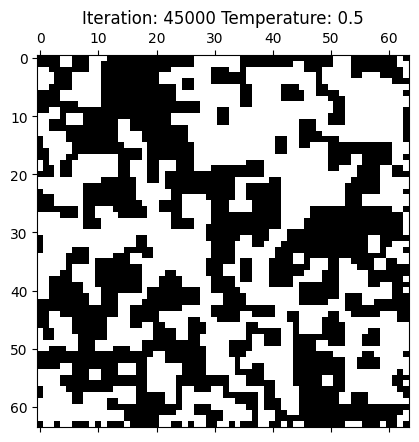

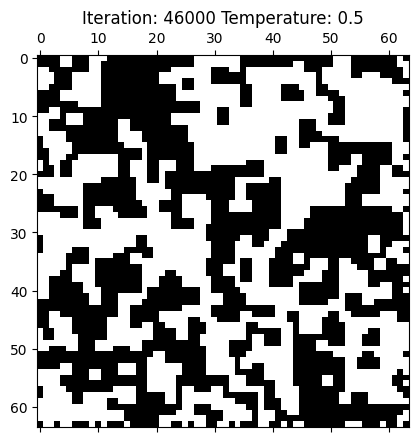

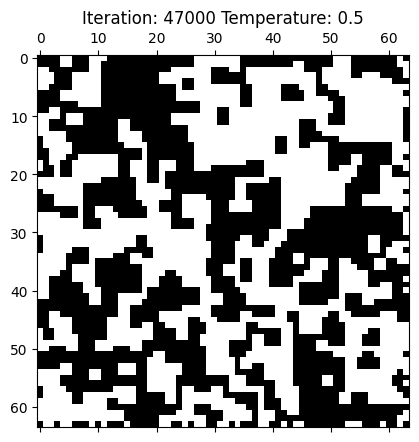

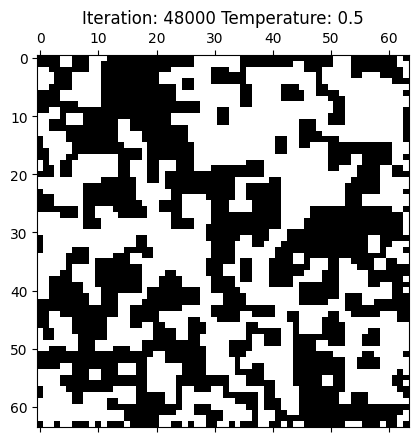

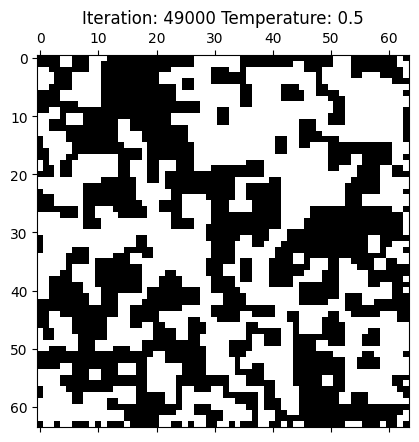

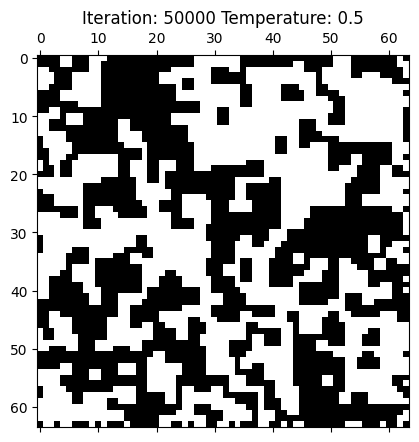

In [43]:
count_list = []
count_adding_up = 0

mag_list = []
internal_energy_list = []
heat_capacity_list = []

iteration_times = 50
iteration_length = 1000

temp = 0.5
for i in range(iteration_times):
    for j in range(iteration_length):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp)
        count_adding_up += count
    plt.matshow(grid_array,cmap='gray')
    plt.title('Iteration: '+str((i+1)*(j+1)) + ' Temperature: '+str(temp))
    plt.savefig('/Users/alex/Desktop/Ising Model/pics/ising_model_'+str(i+1)+'.png')
    #print(count_adding_up)
    count_list.append(count_adding_up)
    mag_list.append(M(grid_array))
    internal_energy_list.append(U(grid_array,0))
    heat_capacity_list.append(heat_capacity(grid_array,temp))

Text(0, 0.5, 'Number of flips (accumulative)')

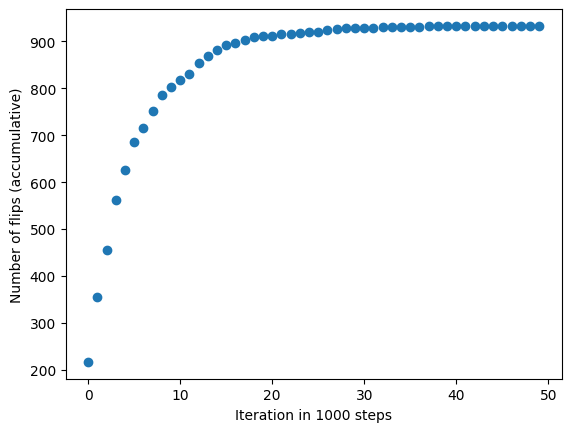

In [44]:
plt.plot(np.arange(iteration_times),count_list, "o")
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Number of flips (accumulative)')

Text(0, 0.5, 'Magnetization')

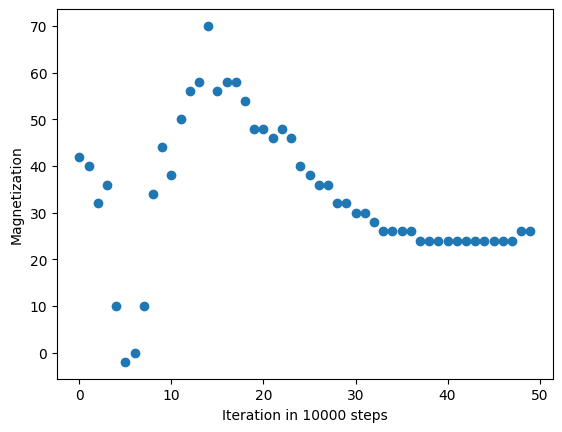

In [45]:
plt.plot(np.arange(iteration_times),mag_list, "o")
plt.xlabel('Iteration in 10000 steps')
plt.ylabel('Magnetization')

Text(0, 0.5, 'Internal Energy')

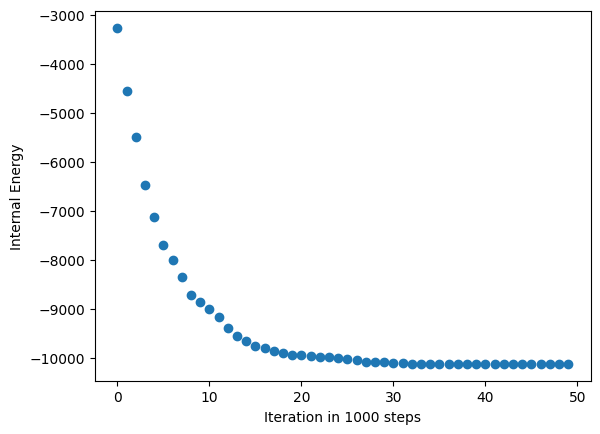

In [46]:
plt.plot(np.arange(iteration_times),internal_energy_list, "o")
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Internal Energy')

Text(0, 0.5, 'Heat Capacity')

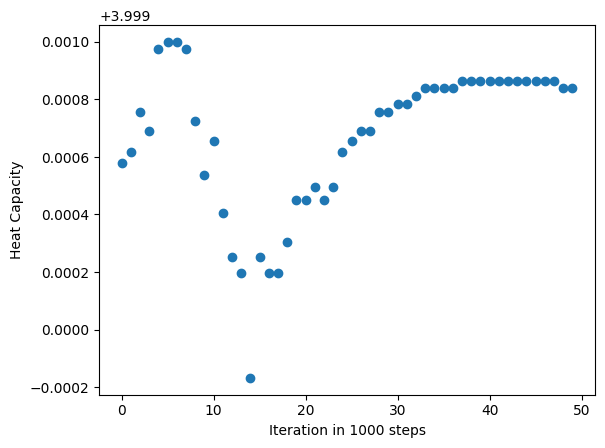

In [47]:
plt.plot(np.arange(iteration_times),heat_capacity_list, "o")
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Heat Capacity')

### Save as gif

In [48]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

image_array = []

for i in range(iteration_times):
    image_array.append(Image.open('/Users/alex/Desktop/Ising Model/pics/ising_model_'+str(i+1)+'.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.


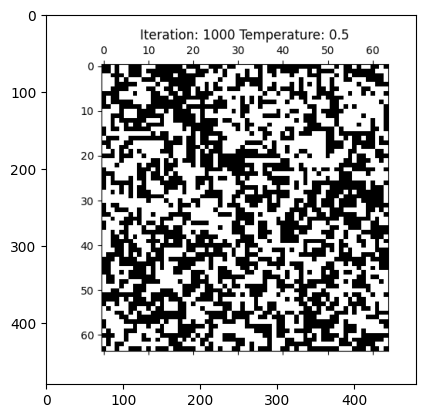

In [49]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('ising_model.gif')

### Make measurements at different temperatures, each after 10000 steps

/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_21588/4253616402.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


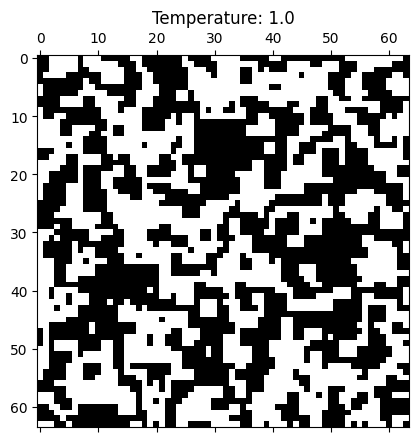

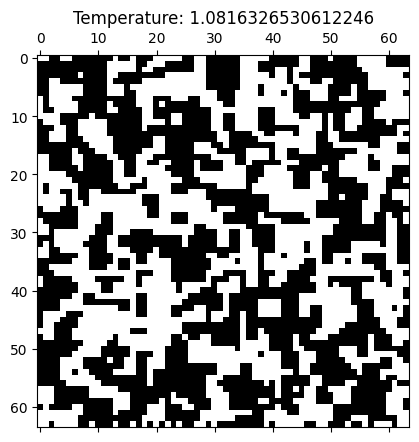

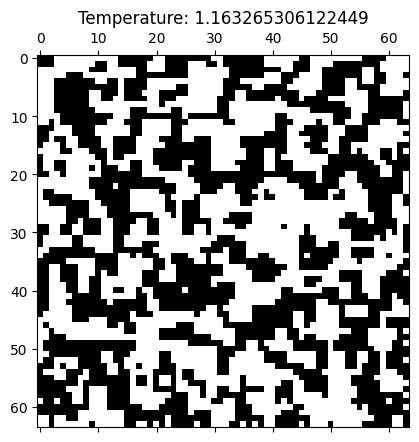

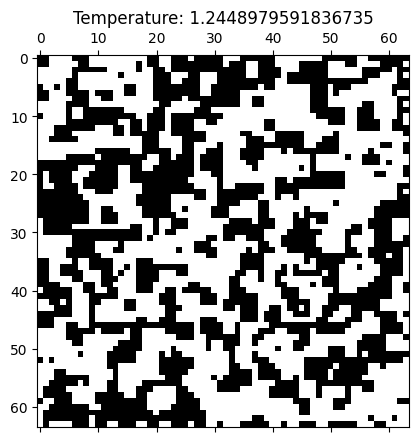

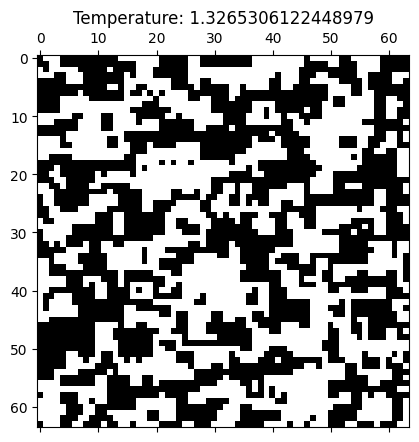

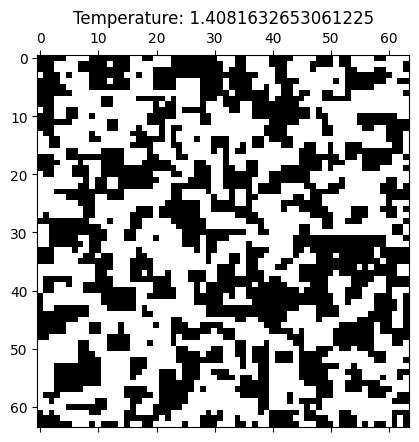

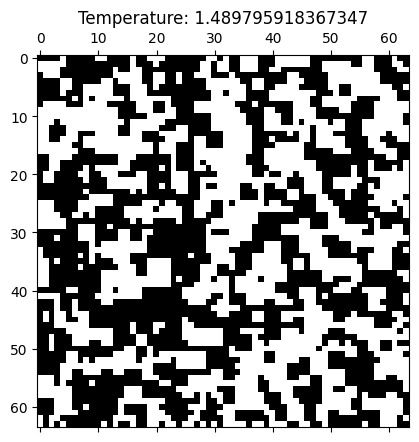

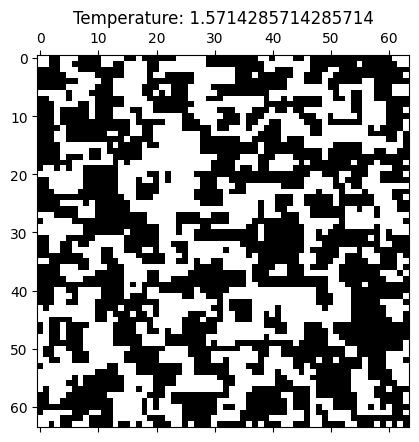

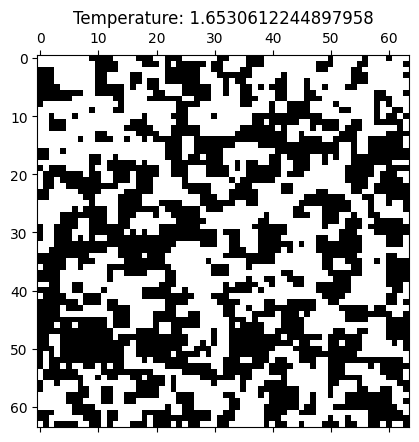

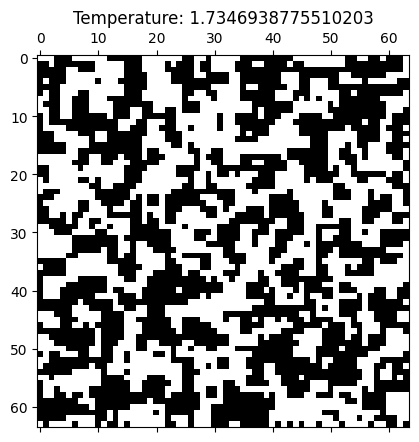

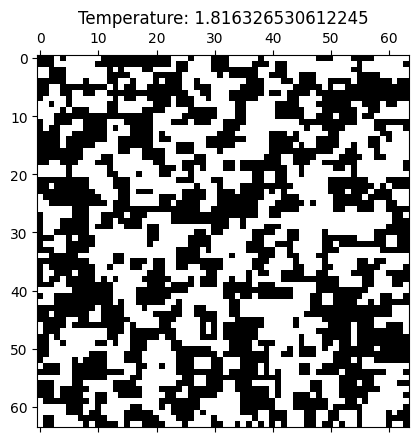

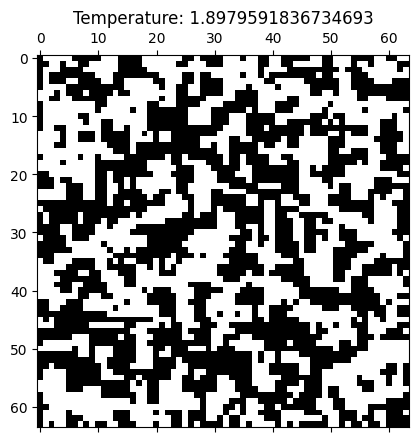

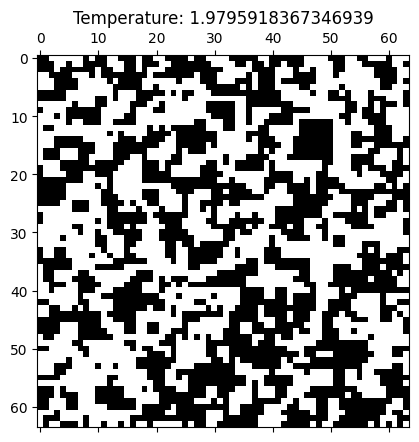

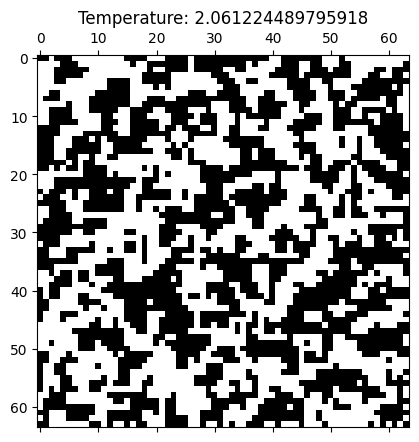

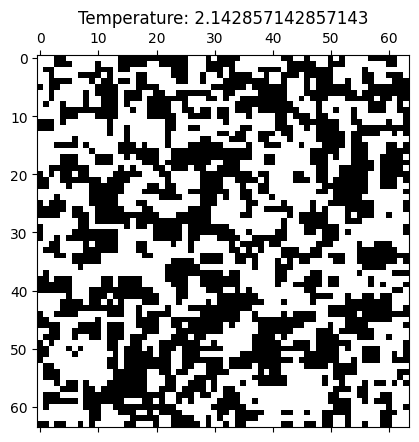

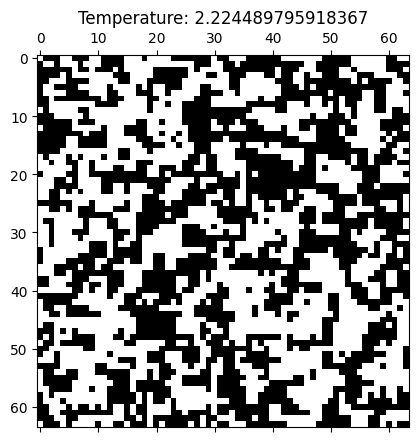

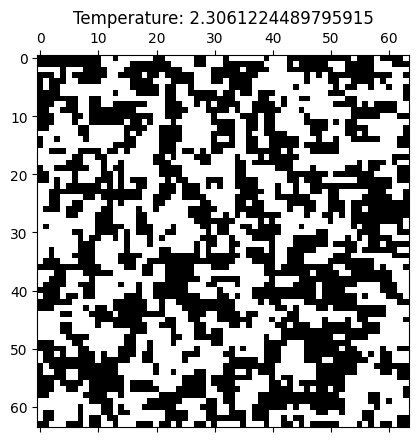

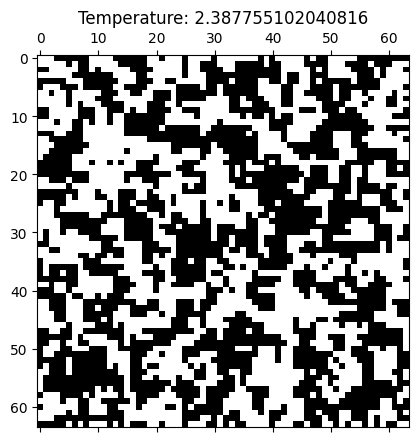

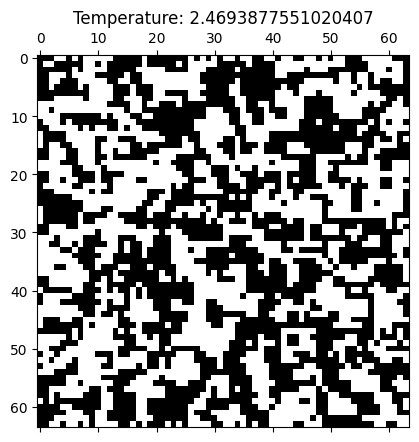

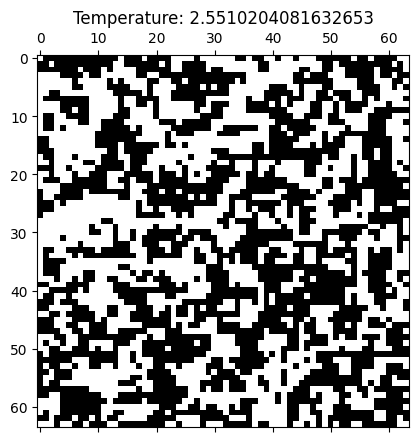

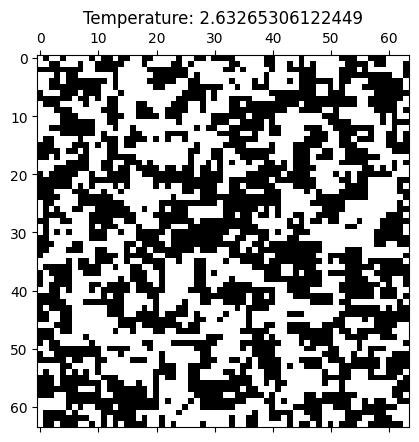

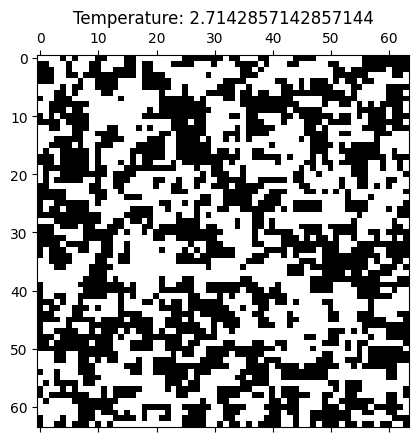

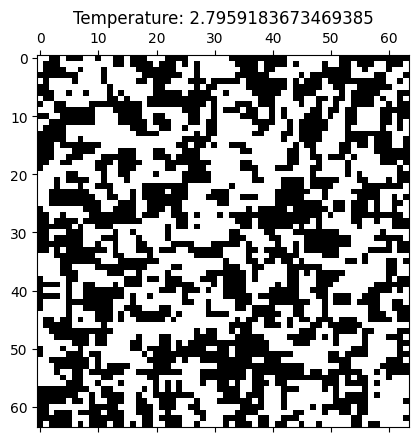

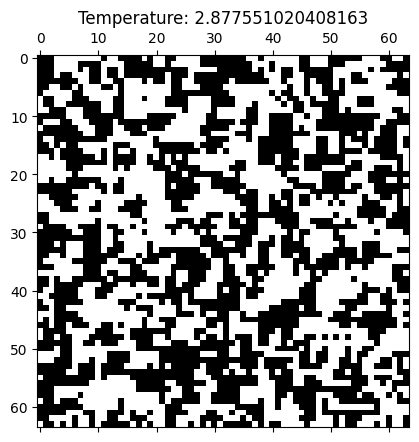

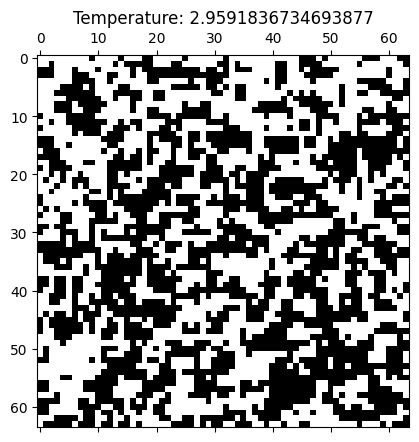

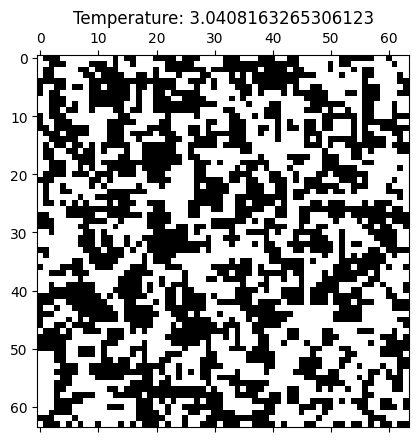

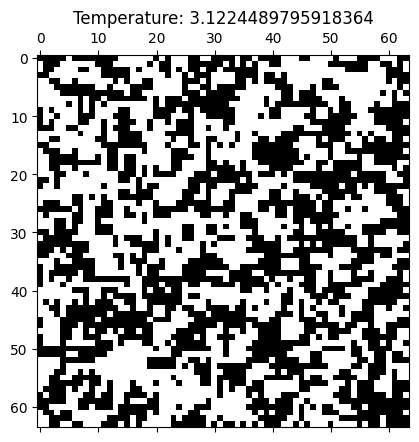

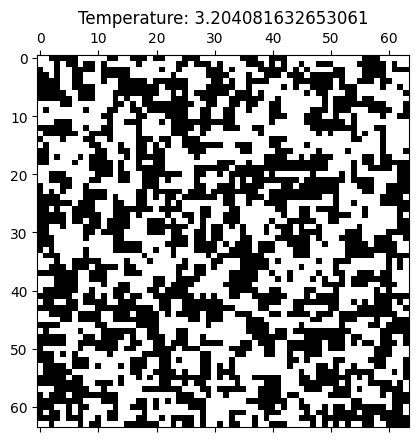

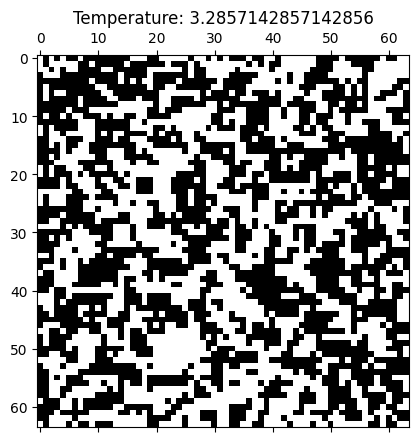

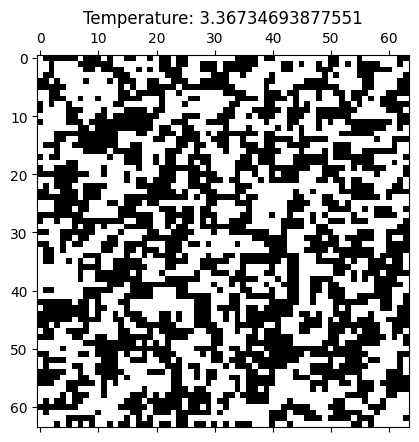

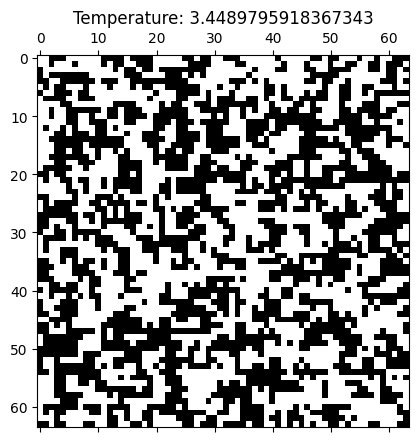

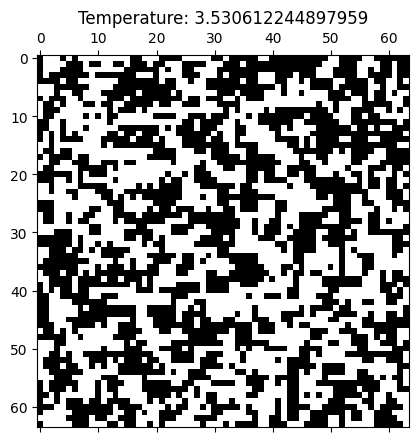

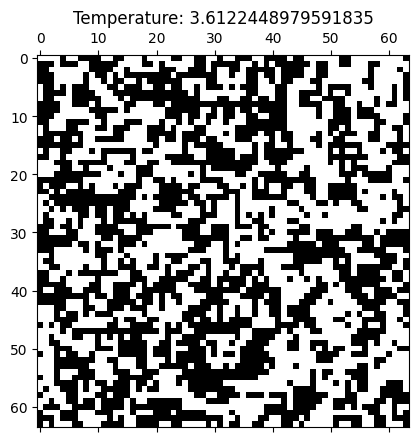

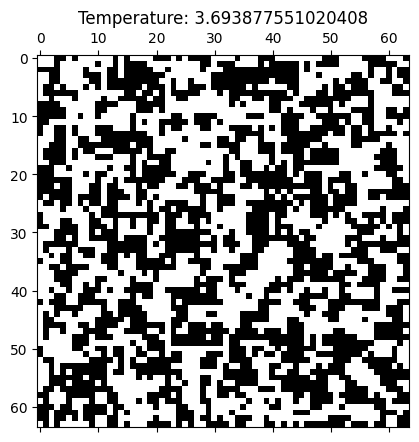

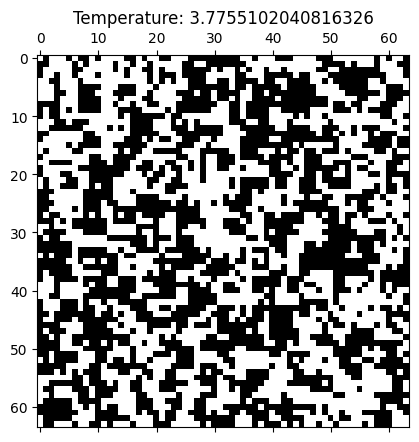

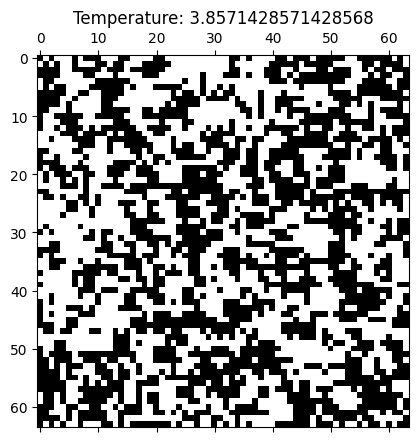

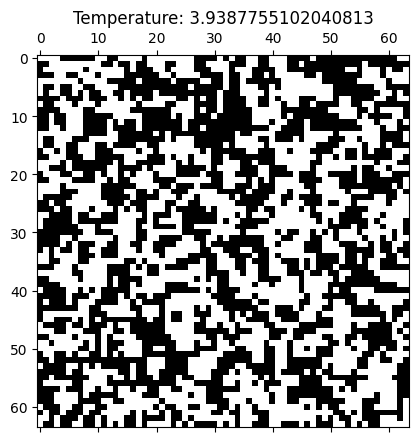

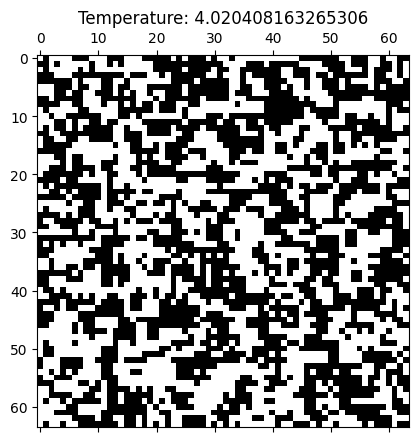

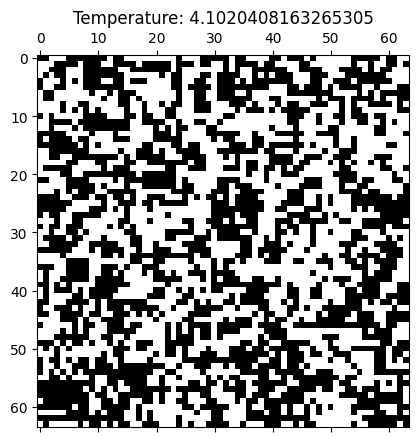

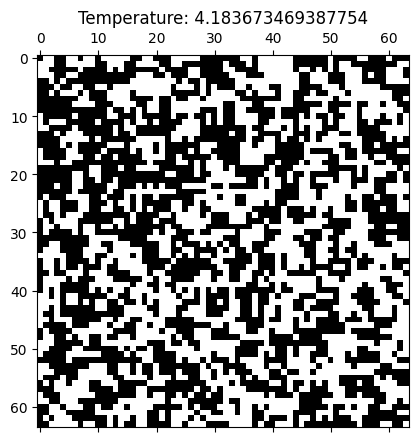

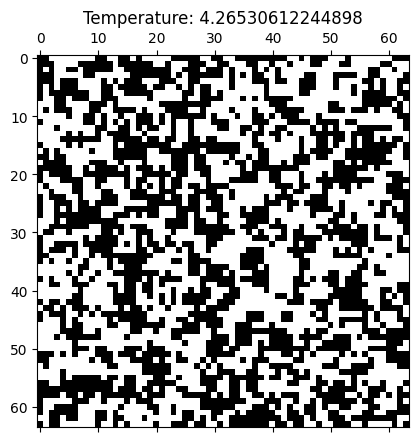

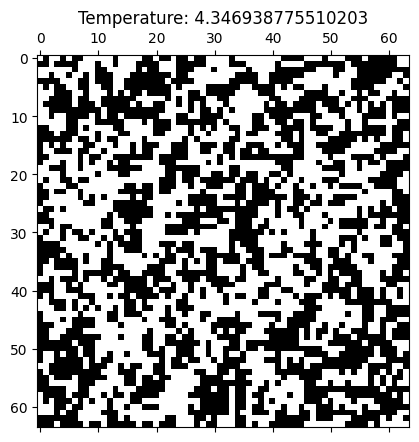

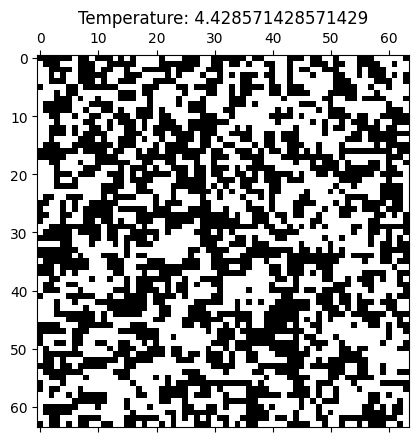

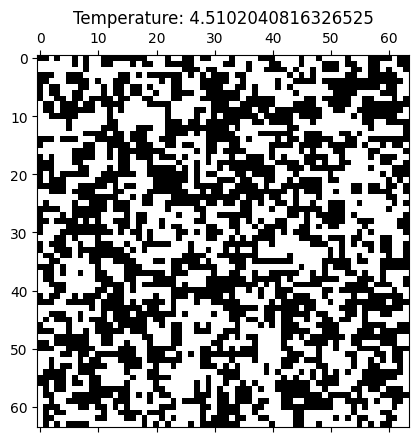

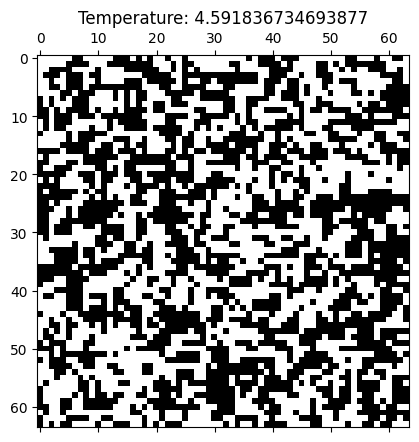

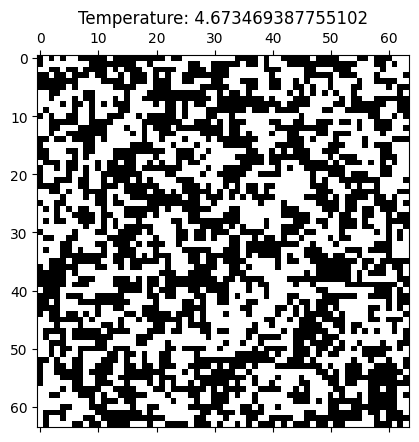

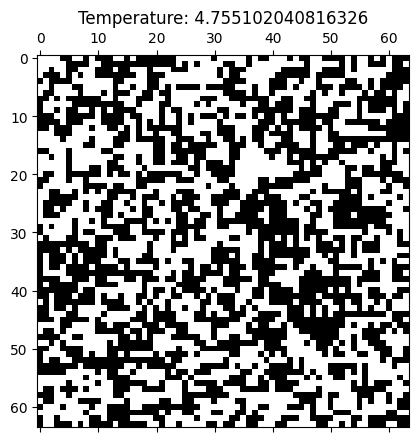

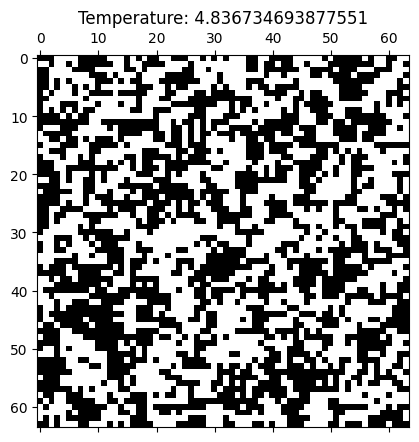

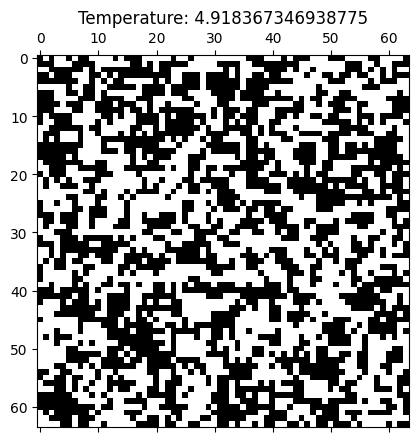

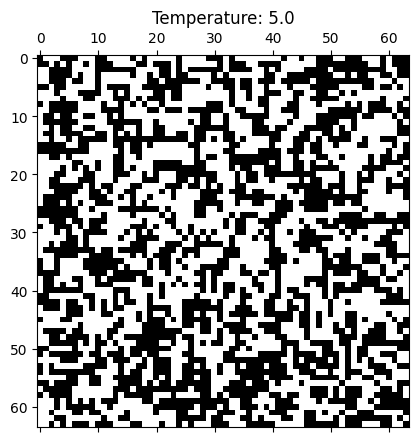

In [54]:
# make measurements af different temperatures for U
temperature_list = np.linspace(1,5,50)

internal_energy_list_temp = []
magnetization_list_temp = []
heat_capacity_list_temp = []

steps_equibrilium = 10000

for temp in temperature_list:
    grid_array = generate_grid(length_grid)

    for i in range(steps_equibrilium):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp)

    internal_energy_list_temp.append(U(grid_array,0))
    magnetization_list_temp.append(M(grid_array))
    heat_capacity_list_temp.append(heat_capacity(grid_array,temp))   
    
    plt.matshow(grid_array,cmap='gray')
    plt.title('Temperature: '+str(temp))

Text(0, 0.5, 'Internal Energy')

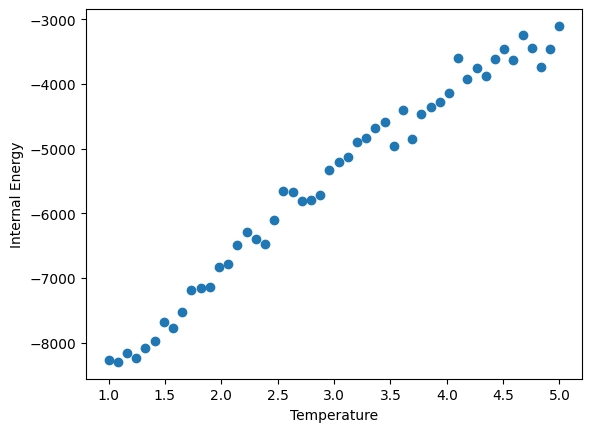

In [55]:
plt.plot(temperature_list,internal_energy_list_temp, "o")
plt.xlabel('Temperature')
plt.ylabel('Internal Energy')

Text(0, 0.5, 'Magnetization')

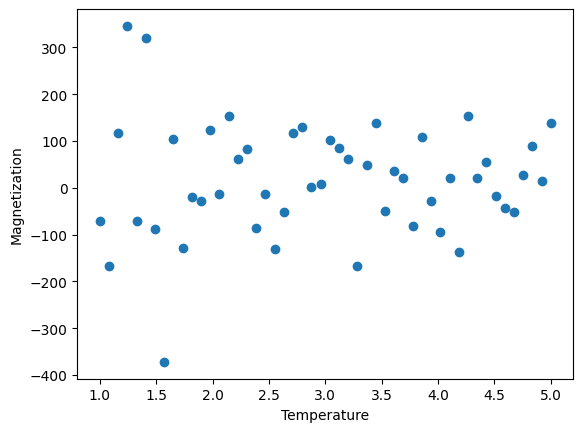

In [58]:
plt.plot(temperature_list,magnetization_list_temp, "o")
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

Text(0, 0.5, 'Heat Capacity')

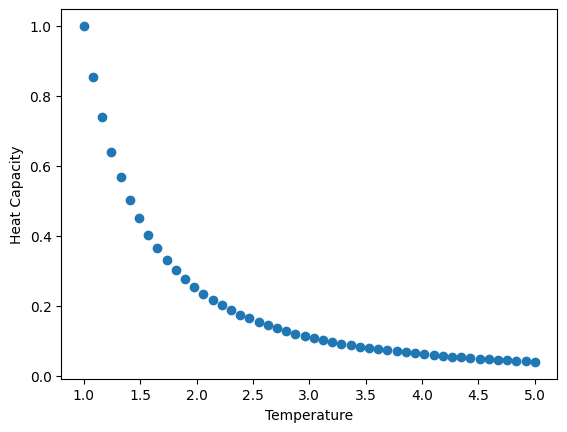

In [59]:
plt.plot(temperature_list,heat_capacity_list_temp, "o")
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')